<b>Подгрузите датасет, отобразите структурную информацию, дайте комментарии по датасету</b>

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [322]:
path_train = 'data/train.csv'
path_test = 'data/test.csv'
path_subm = 'data/submission.csv'

In [323]:
df_train = pd.read_csv(path_train, index_col=0)
df_test = pd.read_csv(path_test, index_col=0)

#Будем загружать ответы как тут
df_subm = pd.read_csv(path_subm, index_col=0)

<i> Посмотрим сколько у нас фичей, какого типа и все ли заполнены

In [324]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12870 entries, 13829 to 20137
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12282 non-null  float64
 1   job        12870 non-null  object 
 2   marital    12870 non-null  object 
 3   education  12870 non-null  object 
 4   default    12870 non-null  object 
 5   balance    12865 non-null  float64
 6   housing    12870 non-null  object 
 7   loan       12870 non-null  object 
 8   contact    12870 non-null  object 
 9   day        12870 non-null  int64  
 10  month      12865 non-null  object 
 11  campaign   12870 non-null  int64  
 12  pdays      12870 non-null  int64  
 13  previous   12870 non-null  int64  
 14  poutcome   12870 non-null  object 
 15  y          12870 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 1.7+ MB


In [325]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4291 entries, 53608 to 51945
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4291 non-null   int64 
 1   job        4291 non-null   object
 2   marital    4291 non-null   object
 3   education  4291 non-null   object
 4   default    4291 non-null   object
 5   balance    4291 non-null   int64 
 6   housing    4291 non-null   object
 7   loan       4291 non-null   object
 8   contact    4291 non-null   object
 9   day        4291 non-null   int64 
 10  month      4291 non-null   object
 11  campaign   4291 non-null   int64 
 12  pdays      4291 non-null   int64 
 13  previous   4291 non-null   int64 
 14  poutcome   4291 non-null   object
dtypes: int64(6), object(9)
memory usage: 536.4+ KB


<i> Посмотрим нашу целевую переменную

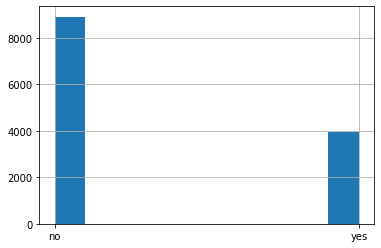

In [326]:
df_train['y'].hist();

In [327]:
# Поменяем y на 0 и 1 (1 - оформил кредит, 0 - иначе)

df_train['y'] = df_train['y'].replace(['no', 'yes'], [0, 1])

<i> Посмотрим на данные обучающей и тестовой выборок

In [328]:
df_train.describe().round(1)

,age,balance,day,campaign,pdays,previous,y
count,12282.0,12865.0,12870.0,12870.0,12870.0,12870.0,12870.0
mean,41.1,1482.9,15.6,2.7,45.6,0.7,0.3
std,11.3,3308.3,8.4,2.9,104.4,2.0,0.5
min,18.0,-6847.0,1.0,1.0,-1.0,0.0,0.0
25%,32.0,102.0,8.0,1.0,-1.0,0.0,0.0
50%,39.0,515.0,16.0,2.0,-1.0,0.0,0.0
75%,49.0,1592.0,21.0,3.0,-1.0,0.0,1.0
max,95.0,102127.0,31.0,43.0,854.0,58.0,1.0


In [329]:
df_test.describe().round(1)

,age,balance,day,campaign,pdays,previous
count,4291.0,4291.0,4291.0,4291.0,4291.0,4291.0
mean,40.9,1474.1,15.8,2.6,46.3,0.7
std,11.3,3118.9,8.3,2.8,104.0,2.0
min,18.0,-3313.0,1.0,1.0,-1.0,0.0
25%,32.0,88.0,8.0,1.0,-1.0,0.0
50%,39.0,515.0,16.0,2.0,-1.0,0.0
75%,49.0,1612.0,21.5,3.0,-1.0,0.0
max,94.0,58932.0,31.0,44.0,842.0,29.0


In [330]:
#Рассмотрим Nan там, где их мало это month и balance

df_train[df_train[['month', 'balance']].isna().any(1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
ID,,,,,,,,,,,,,,,,
13829,NaN,technician,single,tertiary,no,NaN,no,no,cellular,11,NaN,2,-1,0,unknown,0
22677,NaN,services,single,secondary,no,NaN,yes,yes,unknown,5,NaN,3,-1,0,unknown,0
10541,NaN,management,single,secondary,no,NaN,no,no,cellular,14,NaN,2,-1,0,unknown,0
13689,NaN,technician,married,unknown,no,NaN,yes,no,cellular,10,NaN,1,-1,0,unknown,0
11304,NaN,admin.,single,secondary,no,NaN,no,yes,unknown,2,NaN,1,-1,0,unknown,0


<i> Посмотрим на ID клиентов

In [331]:
df_train.sort_index()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
ID,,,,,,,,,,,,,,,,
10000,39.0,management,divorced,tertiary,no,224.0,no,no,cellular,5,apr,1,-1,0,unknown,1
10001,32.0,technician,single,tertiary,no,1732.0,no,no,cellular,12,aug,4,-1,0,unknown,0
10002,38.0,management,married,tertiary,no,165.0,yes,no,cellular,17,apr,1,260,2,other,1
10003,45.0,blue-collar,married,secondary,no,431.0,yes,no,unknown,12,may,1,-1,0,unknown,0
10004,40.0,blue-collar,divorced,primary,no,54.0,yes,no,cellular,13,may,5,362,3,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22865,32.0,technician,single,tertiary,no,654.0,yes,no,cellular,25,may,4,-1,0,unknown,1
22866,39.0,blue-collar,married,primary,no,2288.0,yes,no,cellular,15,may,1,-1,0,unknown,0
22867,63.0,unknown,married,secondary,no,367.0,no,no,telephone,4,mar,1,178,6,failure,0


In [332]:
df_test.sort_index()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,
50000,25,unemployed,single,tertiary,no,343,no,no,cellular,1,jun,1,-1,0,unknown
50001,25,technician,single,secondary,no,1298,no,no,cellular,2,sep,7,94,2,other
50002,29,blue-collar,married,secondary,no,-49,yes,yes,cellular,21,jul,1,-1,0,unknown
50003,49,blue-collar,married,primary,no,216,yes,no,unknown,9,may,2,-1,0,unknown
50004,18,student,single,unknown,no,3,no,no,cellular,25,aug,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54286,57,retired,married,secondary,no,5313,no,no,cellular,16,dec,2,196,1,success
54287,28,blue-collar,single,primary,no,1199,yes,no,cellular,30,jul,20,-1,0,unknown
54288,47,self-employed,married,tertiary,no,3,yes,no,cellular,14,may,15,-1,0,unknown


* Данные разбиты в соотношении 3:1 на обучающую и тестовую выборки
* Видим, что вроде они похоже разбиты по средним значениям числовых фичей (возможно стоит проверить)
* Количество оформленных быстрых кредитов в соотношении 2:1 неположивших к положившим депозит
* Есть значителньые пропуски в возрасте и несколько в балансе и в месяце

## Визуализация

* <b>Какие виды/подвиды типов данных используются в машинном обучении?</b>  
     

    * Числовые (дискретные, непрерывные) 
    * Категориальные (порядковые, номинальные)  


* <b>С помощью чего можно отобразить распределение каждого из признаков?</b>

гистограммы

* <b>Создайте переменные <i>numeric_features, categorical_features</i>, в которые запишите название столбцов числовых и категориальных признаков</b>
* <b>Отобразите распределения всех признаков</b> (можно в одной фигуре все числовые, в другой все категориальные)
* <b>Отобразите основные зависимости</b> (начать с матрицы корреляций и вывести зависимости таргета с самыми значимыми)

In [333]:
# Объединим train и test в один датафрейм
y_train  = df_train['y'].to_list()

df = pd.concat([df_train.drop(columns='y'), df_test], axis = 0)

In [334]:
df.select_dtypes(['int64', 'float64'])

,age,balance,day,campaign,pdays,previous
ID,,,,,,
13829,NaN,NaN,11,2,-1,0
22677,NaN,NaN,5,3,-1,0
10541,NaN,NaN,14,2,-1,0
13689,NaN,NaN,10,1,-1,0
11304,NaN,NaN,2,1,-1,0
...,...,...,...,...,...,...
50332,47.0,520.0,9,6,-1,0
51293,33.0,133.0,12,2,192,1
54023,40.0,2574.0,20,1,-1,0


In [335]:
numeric_features = ['age', 'balance', 'campaign', 'pdays', 'previous']
categorical_features = df.columns.drop(numeric_features)

In [336]:
#Количество числовых и категориальных признаков
len(numeric_features), len(categorical_features)

(5, 10)

In [337]:
df[categorical_features]

,job,marital,education,default,housing,loan,contact,day,month,poutcome
ID,,,,,,,,,,
13829,technician,single,tertiary,no,no,no,cellular,11,NaN,unknown
22677,services,single,secondary,no,yes,yes,unknown,5,NaN,unknown
10541,management,single,secondary,no,no,no,cellular,14,NaN,unknown
13689,technician,married,unknown,no,yes,no,cellular,10,NaN,unknown
11304,admin.,single,secondary,no,no,yes,unknown,2,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...
50332,admin.,married,secondary,no,no,no,telephone,9,feb,unknown
51293,technician,married,secondary,no,no,no,cellular,12,nov,success
54023,admin.,married,secondary,no,yes,no,cellular,20,nov,unknown


<i> Визуализируем распределения фичей

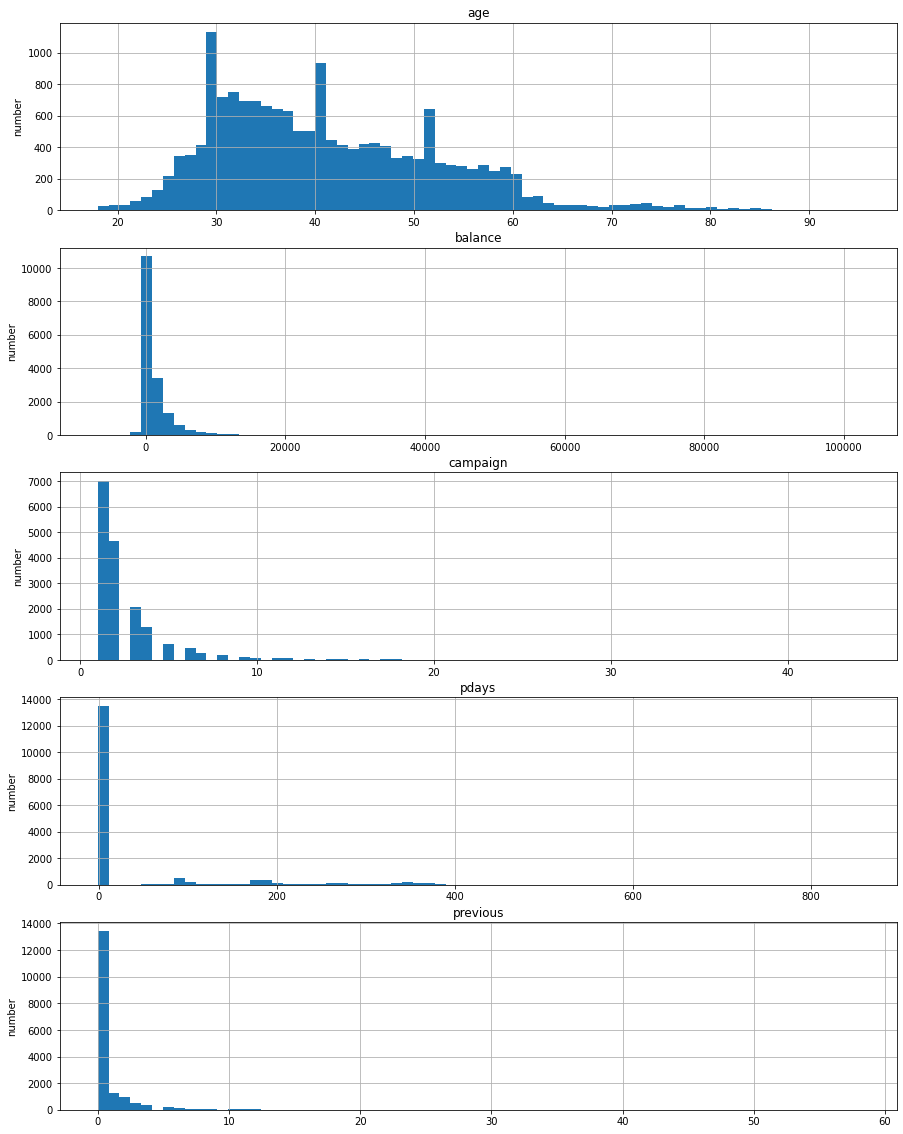

In [338]:
#Рисуем графики зависимости цены от числовых столбцов
_, ax = plt.subplots(5, 1, figsize = (15, 20))
for i in range(5):
    n_col = i
    ax[i].hist(df.loc[:, numeric_features].iloc[:, n_col], bins=70)
    #ax[i].set_yscale('log')
    ax[i].grid()
    ax[i].set(
        ylabel = 'number',
        title = numeric_features[n_col])

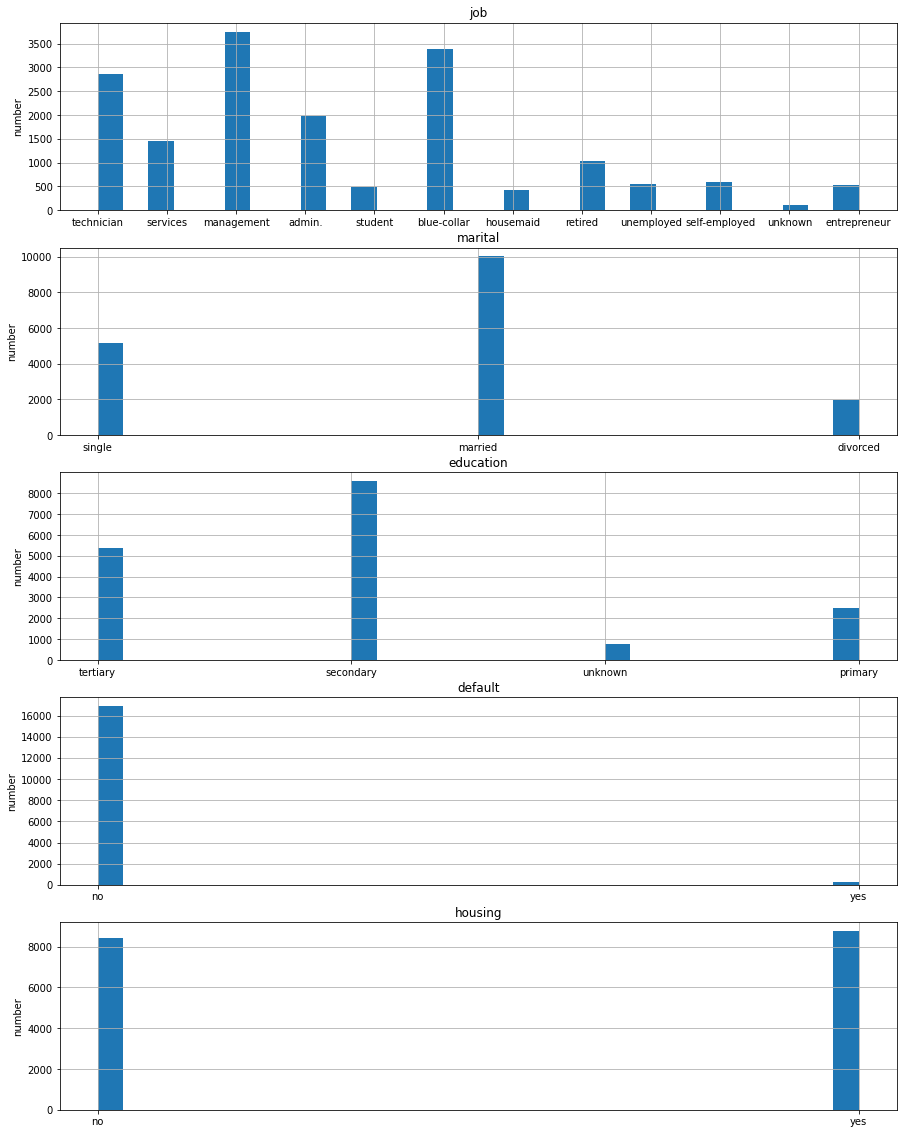

In [339]:
#Рисуем графики зависимости цены от категориальных столбцов _1
_, ax = plt.subplots(5, 1, figsize = (15, 20))
for i in range(5):
    n_col = i
    ax[i].hist(df.loc[:, categorical_features].iloc[:, n_col], bins=30)
    #ax[i].set_yscale('log')
    ax[i].grid()
    ax[i].set(
        ylabel = 'number',
        title = categorical_features[n_col])

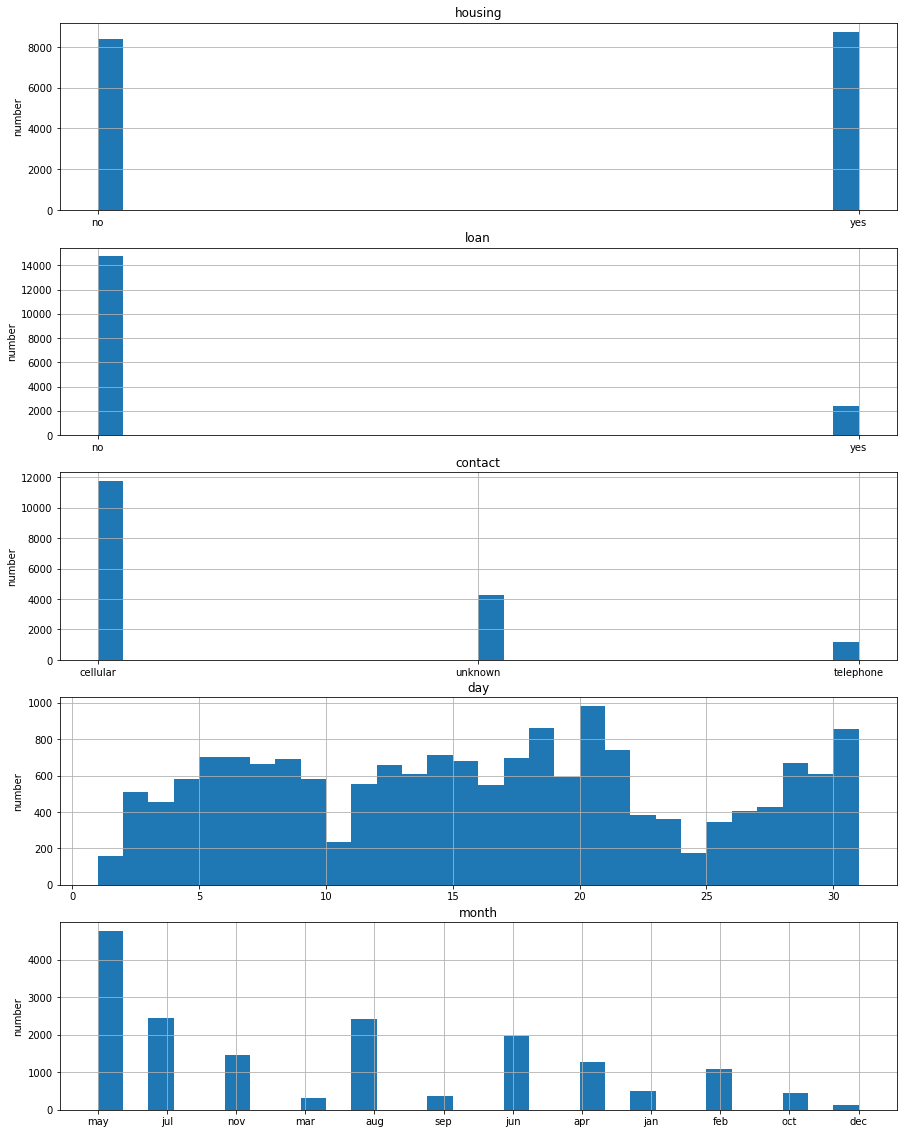

In [340]:
#Рисуем графики зависимости цены от категориальных столбцов _2
_, ax = plt.subplots(5, 1, figsize = (15, 20))
for i in range(5):
    n_col = 4+i
    ax[i].hist(df.loc[:, categorical_features].iloc[:, n_col]\
               .fillna(df.loc[:, categorical_features].iloc[:, n_col].mode()[0]), bins=30)
    #ax[i].set_yscale('log')
    ax[i].grid()
    ax[i].set(
        ylabel = 'number',
        title = categorical_features[n_col])

## Работа с пропусками  

* <b>какими способами можно обработать пропуски:</b>
    - в категориальных переменных
      > Модой
    - в числовых переменных
      > средней или медианой
    
* <b>Какие плюсы у того или иного способа</b>




* <b>Заполните пропуски способом, который считаете нужным</b>

In [341]:
#Рассмотрим Nan там, где их мало это month и balance

df_train[df_train[['month', 'balance']].isna().any(1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
ID,,,,,,,,,,,,,,,,
13829,NaN,technician,single,tertiary,no,NaN,no,no,cellular,11,NaN,2,-1,0,unknown,0
22677,NaN,services,single,secondary,no,NaN,yes,yes,unknown,5,NaN,3,-1,0,unknown,0
10541,NaN,management,single,secondary,no,NaN,no,no,cellular,14,NaN,2,-1,0,unknown,0
13689,NaN,technician,married,unknown,no,NaN,yes,no,cellular,10,NaN,1,-1,0,unknown,0
11304,NaN,admin.,single,secondary,no,NaN,no,yes,unknown,2,NaN,1,-1,0,unknown,0


In [342]:
# Если баланс не известен, то заполняем 0 (что его нет)
# Месяц заполняем самым частым месяцем 
df['balance'] = df['balance'].fillna(0)
df['month'] = df['month'].fillna(df['month'].mode()[0])

In [343]:
# Заполняем возраст средним по профессии
#df = df.fillna(dict(df.groupby(by = 'job')['age'].mean().astype(int)),axis=0)
df['age'] = df.apply(
    lambda row: dict(df.groupby(by = 'job')['age'].mean().astype(int))[row['job']]
    if np.isnan(row['age']) else row['age'],
    axis=1)

In [344]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

## Статистика



* <b>Что такое t-test/z-test и для чего он применяется?</b>

Проверка гипотезы о равенстве средних при неизвестном и известном дисперсии соответственно

* <b>Примените t-test для проверки значимости признака `balance` в разрезе класса</b> и прокомментируйте поулученный результат

In [346]:
from scipy.stats import ttest_ind

In [347]:
ttest_ind(df_train.fillna(0)[df_train['y'] == 0]['balance'], df_train.fillna(0)[df_train['y'] == 1]['balance'])

Ttest_indResult(statistic=-7.696864017900948, pvalue=1.4959531894013122e-14)

Так значение p-value достаточно низкое, то значит эти две подвыборки статистически значимы, то есть
фича <b>balance </b> влияет на целевой признак

## Кодирование категориальных перменных

* <b>Для чего нужно кодировать категориальные переменные?</b>
    > Потому что модели машинного обучения работают с числами как минимум при вычислении градиента
* <b>Какие способы кодирования категориальных переменных вам известно</b>
    > one-hot, target, label

* <b>Закодируйте переменные соответствующим способом</b>

In [348]:
one_hot_features = ['job', 'default', 'housing', 'loan', 'contact', 'month', 'day']
label_features = list(set(categorical_features) - set(one_hot_features))
label_features

['marital', 'poutcome', 'education']

In [349]:
df[categorical_features].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
day          31
month        12
poutcome      4
dtype: int64

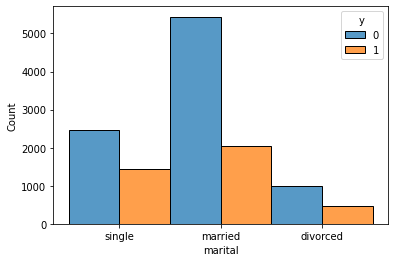

In [350]:
sns.histplot(x="marital", hue="y", multiple='dodge', data=df_train);

In [351]:
#Заполним фичу marital их долями оставлять депозит
mar_divorced = len(df_train[(df_train['y'] == 1) & (df_train['marital'] == 'divorced')])/len(df_train['marital'] == 'divorced')
mar_single = len(df_train[(df_train['y'] == 1) & (df_train['marital'] == 'single')])/len(df_train['marital'] == 'single')
mar_married = len(df_train[(df_train['y'] == 1) & (df_train['marital'] == 'married')])/len(df_train['marital'] == 'married')

df['marital'] = df['marital'].replace('divorced', mar_divorced)
df['marital'] = df['marital'].replace('single', mar_single)
df['marital'] = df['marital'].replace('married', mar_married)

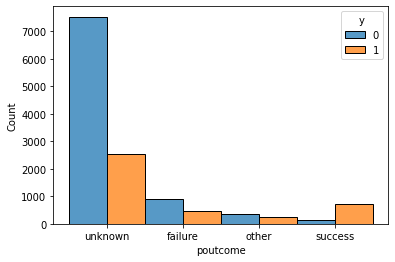

In [352]:
sns.histplot(x="poutcome", hue="y", multiple='dodge', data=df_train);

In [353]:
#Заполним фичу poutcome их долями оставлять депозит
pout_unkn = len(df_train[(df_train['y'] == 1) & (df_train['poutcome'] == 'unknown')])/len(df_train['poutcome'] == 'unknown')
pout_other = len(df_train[(df_train['y'] == 1) & (df_train['poutcome'] == 'other')])/len(df_train['poutcome'] == 'other')
pout_fail = len(df_train[(df_train['y'] == 1) & (df_train['poutcome'] == 'failure')])/len(df_train['poutcome'] == 'failure')
pout_suc = len(df_train[(df_train['y'] == 1) & (df_train['poutcome'] == 'success')])/len(df_train['poutcome'] == 'success')

df['poutcome'] = df['poutcome'].replace('unknown', pout_unkn)
df['poutcome'] = df['poutcome'].replace('other', pout_other)
df['poutcome'] = df['poutcome'].replace('failure', pout_fail)
df['poutcome'] = df['poutcome'].replace('success', pout_suc)

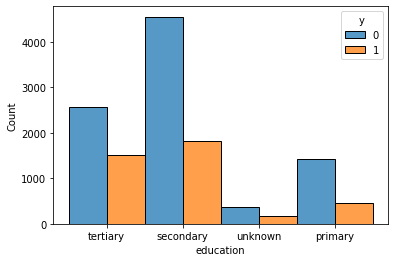

In [354]:
sns.histplot(x="education", hue="y", multiple='dodge', data=df_train);

In [355]:
#Заполним фичу образование их долями оставлять депозит
edu_tert = len(df_train[(df_train['y'] == 1) & (df_train['education'] == 'tertiary')])/len(df_train['education'] == 'tertiary')
edu_sec = len(df_train[(df_train['y'] == 1) & (df_train['education'] == 'secondary')])/len(df_train['education'] == 'secondary')
edu_prim = len(df_train[(df_train['y'] == 1) & (df_train['education'] == 'primary')])/len(df_train['education'] == 'primary')
edu_unkn = len(df_train[(df_train['y'] == 1) & (df_train['education'] == 'unknown')])/len(df_train['education'] == 'unknown')

df['education'] = df['education'].replace('tertiary', edu_tert)
df['education'] = df['education'].replace('secondary', edu_sec)
df['education'] = df['education'].replace('primary', edu_prim)
df['education'] = df['education'].replace('unknown', edu_unkn)

In [356]:
df.shape

(17161, 15)

In [357]:
df['pdays'] = df['pdays'].replace(-1, df['pdays'].max())

In [358]:
df = pd.get_dummies(df, columns=one_hot_features)

In [359]:
#Чтобы посмотреть значения всех колонок
pd.set_option('display.max_columns', 80)

In [360]:
df.shape

(17161, 72)

## Scaling

* <b>Какие основные Scaler'ы знаете</b>
    > StandardScaler, MinMaxScaler
* <b>Для чего это нужно</b>
    > Чтобы привести все переменные к одной шкале и учитывать их равнозначно

* <b>Отобразите боксплоты, отмасштабируйте свои признаки</b>

In [361]:
from sklearn.preprocessing import StandardScaler

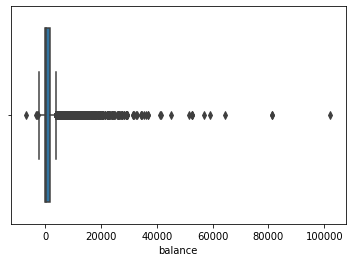

In [362]:
sns.boxplot(x=df['balance']);

In [363]:
ss_scaler = StandardScaler()
scal = ss_scaler.fit_transform(df)
X_scaled = pd.DataFrame(scal, columns=df.columns)

<AxesSubplot:xlabel='balance'>

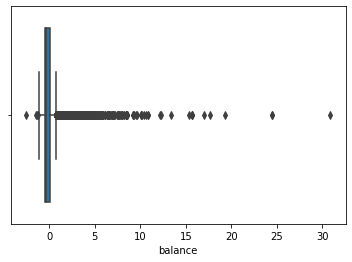

In [364]:
sns.boxplot(x=X_scaled['balance'])

In [365]:
X_train = X_scaled.iloc[:12870]
X_test = X_scaled.iloc[12870:]

# Классификация

Решите задачу классификации для переменной `y` и сформируйте файл для `submission`. Не забывай, что твоя первая модель `baseline` - должна быть самой простой с точки зрения предобработки и настройки.

❗️ Столбец с предсказаниями в файле `submission.csv` должен называться `predict`. Если он будет называться иначе, файл не пройдет валидацию. \
❗️ Обратите внимание, что `ID` в файле `test.csv` и `submission.csv` совпадают. Решить задачу нужно для каждого конкретного `ID`.  

In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [367]:
from sklearn.model_selection import GridSearchCV

In [369]:
lr = LogisticRegression()
rf = RandomForestClassifier()
catb = CatBoostClassifier(verbose = 0)

In [400]:
#GridSearchCV on randomForest

rf_base_params = {
    'n_estimators': [60, 100, 120],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3]
}

cv_rf = GridSearchCV(rf, param_grid=rf_base_params, scoring='roc_auc', cv=4, n_jobs=-1)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [60, 100, 120]},
             scoring='accuracy')

In [420]:
pd.DataFrame(cv_rf.best_estimator_.feature_importances_, index = X_train.columns).sort_values(by=0).tail(20)

,0
job_student,0.009521
month_jun,0.009792
job_blue-collar,0.010039
month_aug,0.010617
marital,0.011171
month_apr,0.015690
campaign,0.017610
month_sep,0.020313
month_mar,0.028517
balance,0.029421


In [405]:
#GridSearchCV on Catboost

catb_base_params = {
    'depth': [4,5,6, 2, 3],
    'learning_rate': [0.01,0.02,0.03, 0.1, 0.05],
    'iterations': [20,30,40, 60, 70,80, 100]
}

cv_catb = GridSearchCV(catb, param_grid=catb_base_params, scoring='roc_auc', cv=4, 
                  n_jobs=-1, verbose=0)
cv_catb.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f12e2204ca0>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 2, 3],
                         'iterations': [20, 30, 40, 60, 70, 80, 100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.1, 0.05]},
             scoring='roc_auc')

In [370]:
# lr.fit(X_train, y_train)
# rf.fit(X_train, y_train)
# catb.fit(X_train, y_train)

# lr_pred = lr.predict(X_test)
# rf_pred = rf.predict(X_test)
# catb_pred = catb.predict(X_test)

In [312]:

assert len(pd.read_csv('data/test.csv')) == len(pd.read_csv('data/submission.csv')), \
    'Lengths of files are mismatch!'

In [372]:
#Записать модель в файл

test = pd.DataFrame({'ID': df_test.index.to_list(), 'predict': np.ravel(lr_pred)})
test = test.set_index('ID')
test.to_csv('pred_lr.csv')

Your roc_auc score is: 0.668



In [404]:
#Записать модель в файл
#rf_pred = cv_rf.best_estimator_.predict(X_test)

test = pd.DataFrame({'ID': df_test.index.to_list(), 'predict': np.ravel(rf_pred)})
test = test.set_index('ID')
test.to_csv('pred_rf.csv')

Your roc_auc score is: 0.7059


In [408]:
#Записать модель в файл
catb_pred = cv_catb.best_estimator_.predict(X_test)

test = pd.DataFrame({'ID': df_test.index.to_list(), 'predict': np.ravel(catb_pred)})
test = test.set_index('ID')
test.to_csv('pred_catb.csv')

Your roc_auc score is: 0.7156

### baseline easy

In [375]:
#Тест и train объединили
df_base = pd.concat([df_train.drop(columns = 'y'), df_test])

In [376]:
#Заполняем Nan
df_base['balance'] = df_base['balance'].fillna(0)
df_base['month'] = df_base['month'].fillna(df_base['month'].mode()[0])
df_base['age'] = df_base['age'].fillna(df_base['age'].median())

In [377]:
#
df_base = pd.get_dummies(df_base, columns=df_base.select_dtypes('object').columns)

In [378]:
base_scal = ss_scaler.fit_transform(df_base)
X_base = pd.DataFrame(base_scal, columns=df_base.columns)

In [379]:
X_base_train = X_base[:12870] 
X_base_test = X_base[12870:]

In [384]:
lr_base = LogisticRegression()
rf_base = RandomForestClassifier()
catb_base = CatBoostClassifier(verbose = 0)

In [409]:
rf_base_params = {
    'n_estimators': [80, 100, 140],
    'max_depth': [1, 3, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3]
}

cv_rf_base = GridSearchCV(rf_base, param_grid=rf_base_params, scoring='roc_auc', cv=4, n_jobs=-1)
cv_rf_base.fit(X_base_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 7, 8], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 140]},
             scoring='roc_auc')

In [410]:
cv_rf_base.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=140)

In [ ]:
#GridSearchCV  on RandomForest

# rforest_params = {
#     'n_estimators': np.arange(40,200,10),
#     'max_depth': np.arange(1,20,2),
#     'min_samples_leaf': np.arange(1,20,2)
# }
# rf = RandomForestRegressor()

# cv_rndfrst = GridSearchCV(rf, param_grid=rforest_params, scoring='neg_mean_squared_error', cv=5, 
#                   n_jobs=-1, verbose=0)
# cv_rndfrst.fit(X_train, y['SalePrice'])

In [393]:
catb_base_params = {
    'depth': [4, 6, 7, 8, 10],
    'learning_rate': [0.03, 0.04, 0.1, 0.5],
    'iterations': [80, 90, 100, 120, 140]
}

cv_catb_base = GridSearchCV(catb_base, param_grid=catb_base_params, scoring='roc_auc', cv=5, 
                  n_jobs=-1, verbose=0)
cv_catb_base.fit(X_base_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f12a6ab71c0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 7, 8, 10],
                         'iterations': [80, 90, 100, 120, 140],
                         'learning_rate': [0.03, 0.04, 0.1, 0.5]},
             scoring='roc_auc')

In [397]:
cv_catb_base.best_params_

{'depth': 7, 'iterations': 120, 'learning_rate': 0.1}

In [385]:
lr_base.fit(X_base_train, y_train)
rf_base.fit(X_base_train, y_train)
catb_base.fit(X_base_train, y_train)

In [386]:
lr_base_pred = lr_base.predict(X_base_test)
rf_base_pred = rf_base.predict(X_base_test)
catb_base_pred = catb_base.predict(X_base_test)

In [387]:
#Записать модель в файл

test = pd.DataFrame({'ID': df_test.index.to_list(), 'predict': np.ravel(lr_base_pred)})
test = test.set_index('ID')
test.to_csv('pred_base_lr.csv')

Your roc_auc score is: 0.6780

In [411]:
#Записать модель в файл

rf_base_pred = cv_rf_base.best_estimator_.predict(X_base_test)

test = pd.DataFrame({'ID': df_test.index.to_list(), 'predict': np.ravel(rf_base_pred)})
test = test.set_index('ID')
test.to_csv('pred_base_rf.csv')

Your roc_auc score is: 0.7147

In [398]:
#Записать модель в файл

#catb_base_pred = cv_catb_base.best_estimator_.predict(X_base_test)

test = pd.DataFrame({'ID': df_test.index.to_list(), 'predict': np.ravel(catb_base_pred)})
test = test.set_index('ID')
test.to_csv('pred_base_catb.csv')

Your roc_auc score is: 0.7205

In [412]:
!git add ml_assessment.ipynb
!git commit -m "Classification task is done"
!git push

[master 9b543d2] Classification task is done
 1 file changed, 3132 insertions(+), 53 deletions(-)
Перечисление объектов: 5, готово.
Подсчет объектов: 100% (5/5), готово.
При сжатии изменений используется до 4 потоков
Сжатие объектов: 100% (3/3), готово.
Запись объектов: 100% (3/3), 135.76 КиБ | 2.89 МиБ/с, готово.
Всего 3 (изменений 1), повторно использовано 0 (изменений 0), повторно использовано пакетов 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:SSanchay/ml-assessment.git
   fd64cb6..9b543d2  master -> master


In [413]:
!git status

На ветке master
Ваша ветка обновлена в соответствии с «origin/master».

Неотслеживаемые файлы:
  (используйте «git add <файл>…», чтобы добавить в то, что будет включено в коммит)
	catboost_info/
	pred_base_catb.csv
	pred_base_lr.csv
	pred_base_rf.csv
	pred_catb.csv
	pred_lr.csv
	pred_rf.csv

ничего не добавлено в коммит, но есть неотслеживаемые файлы (используйте «git add», чтобы отслеживать их)
